# Содержание

- [Задание 1](#задание-1)
  - [Задание 1.1](#задание-11)
  - [Задание 1.2](#задание-12)
- [Задание 2](#задание-2)
- [Задание 3](#задание-3)



<a id="задание-1"></a>
## Задание 1


In [1]:
# Загружаем необходимые библиотеки
import os
import pandas as pd 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


<a id="задание-11"></a>
### Задание 1.1

Вернуться [к Заданию 1](#задание-1) или [к содержанию](#содержание).

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")


In [2]:
# Получить текущий рабочий каталог
current_directory = os.getcwd()
# Вывести текущий каталог
print(f"Текущий рабочий каталог: {current_directory}")


Текущий рабочий каталог: /Users/kseniiabogatenkova/WB_Python


In [3]:
# Пути к файлу
shopping_trends_path = "shopping_trends.csv"
# Загрузка данных в DataFrame
shopping_trends = pd.read_csv(shopping_trends_path)


In [4]:
shopping_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
shopping_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
# Загрузка данных
df_original = pd.read_csv("shopping_trends.csv")  # Укажите путь к вашему CSV-файлу

# Преобразование категориального столбца 'Frequency of Purchases' в числовой
frequency_mapping = {
    'Annually': 1,
    'Quarterly': 2,
    'Every 3 Months': 2,
    'Monthly': 3,
    'Bi-Weekly': 4,
    'Fortnightly': 5,
    'Weekly': 5
}
df_original['Frequency Score'] = df_original['Frequency of Purchases'].map(frequency_mapping)

# Обработка бесконечных значений в 'Previous Purchases'
df_original['Previous Purchases'] = df_original['Previous Purchases'].replace([np.inf, -np.inf], np.nan)
df_original['Previous Purchases'].fillna(df_original['Previous Purchases'].max(), inplace=True)

# Проверка результата
print(df_original[['Frequency of Purchases', 'Frequency Score', 'Previous Purchases']].head())


  Frequency of Purchases  Frequency Score  Previous Purchases
0            Fortnightly                5                  14
1            Fortnightly                5                   2
2                 Weekly                5                  23
3                 Weekly                5                  49
4               Annually                1                  31


### "Это всего лишь гипотеза" (1)

Чем старше мы становимся, тем сильнее хотим доказать себе, что чего-то стоим. Один из способов сделать это — покупки. Когда возникают эти экзистенциальные порывы, желание доказать что-то себе и обществу? Чаще всего они проявляются на возрастных рубежах, и один из таких рубежей — 30 лет. Давайте посмотрим, как желание самоутвердиться в сочетании с наличием финансов в зрелом возрасте влияет на количество и частоту покупок.

Корреляция между количеством предыдущих покупок и частотой (женщины 30+): -0.07
P-value: 0.0291
Гипотеза не подтверждается, мы не безнадежны: хотя связь статистически значима, она слишком слабая.


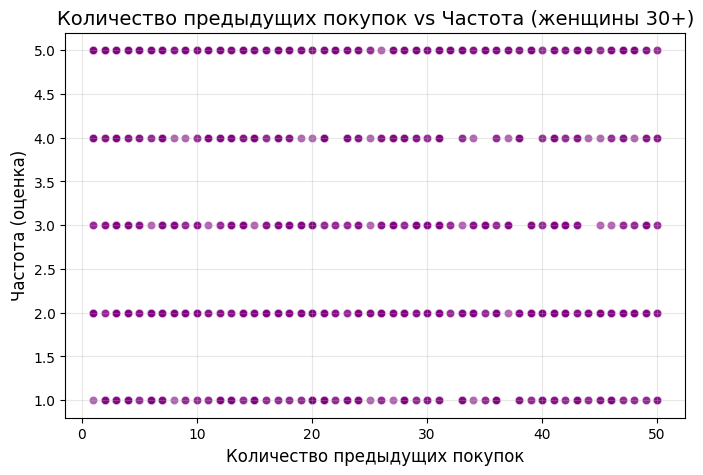

In [7]:
# Фильтрация данных: женщины старше 30 лет
women_30_plus = df_original[(df_original['Gender'] == 'Female') & (df_original['Age'] > 30)]

# Проверка корреляции
frequency_corr, p_value_frequency = stats.pearsonr(
    women_30_plus['Previous Purchases'], 
    women_30_plus['Frequency Score']
)

# Вывод результатов
print(f"Корреляция между количеством предыдущих покупок и частотой (женщины 30+): {frequency_corr:.2f}")
print(f"P-value: {p_value_frequency:.4f}")

# Интерпретация гипотезы
if p_value_frequency < 0.05:
    if abs(frequency_corr) > 0.3:  # Условно считаем связь значимой, если коэффициент больше 0.3
        print("Гипотеза подтверждается: существует значимая корреляция между количеством предыдущих покупок и частотой у женщин старше 30.")
    else:
        print("Гипотеза не подтверждается, мы не безнадежны: хотя связь статистически значима, она слишком слабая.")
else:
    print("Гипотеза не подтверждается: корреляция статистически незначима.")

# Визуализация
plt.figure(figsize=(8, 5))
sns.scatterplot(x=women_30_plus['Previous Purchases'], y=women_30_plus['Frequency Score'], alpha=0.6, color='purple')
plt.title("Количество предыдущих покупок vs Частота (женщины 30+)", fontsize=14)
plt.xlabel("Количество предыдущих покупок", fontsize=12)
plt.ylabel("Частота (оценка)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [8]:
# Вывести все уникальные категории товаров
categories = df_original['Category'].unique()

# Показать список категорий
print("Категории товаров в данных:")
print(list(categories))

Категории товаров в данных:
['Clothing', 'Footwear', 'Outerwear', 'Accessories']


### "Old money" (2)

Значение осязаемого или приверженность старым принципам? Рассмотрим, как привычки из прошлого влияют на выбор сегодня. Наши мамы и бабушки привыкли использовать кэш в расчетах. Так ли это? Подтвердим или опровергнем, вперед!



Распределение способов оплаты среди людей старше 60 лет:
Preferred Payment Method
Credit Card      0.192254
Cash             0.182573
Venmo            0.160443
Bank Transfer    0.159059
Debit Card       0.156293
PayPal           0.149378
Name: proportion, dtype: float64


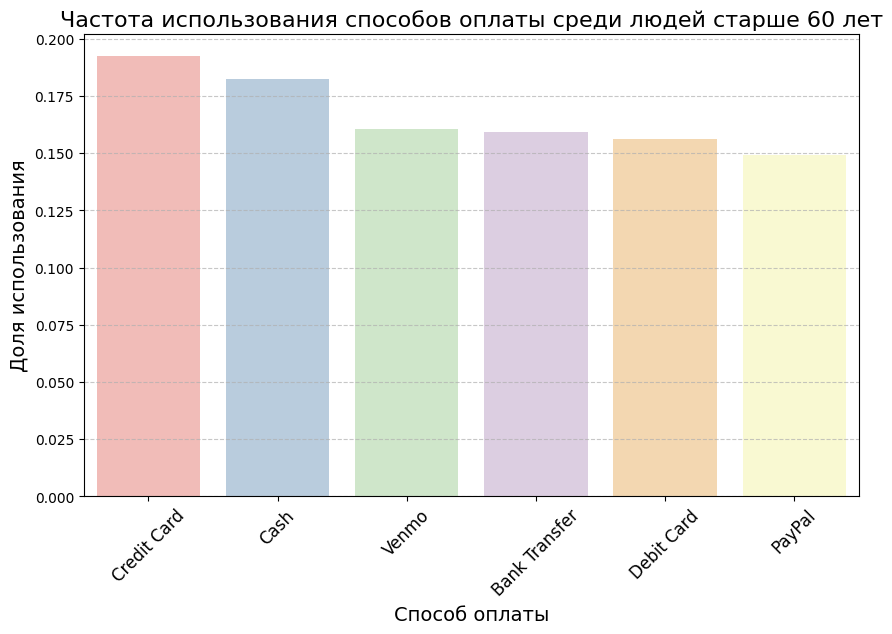

Хи-квадрат: 291.39834024896265, p-value: 2.465318961545886e-65
Гипотеза подтверждается: люди старше 60 лет чаще используют кэш как способ оплаты.


In [9]:
# Фильтрация данных: люди старше 60 лет
over_60 = df_original[df_original['Age'] > 60]

# Доля использований каждого способа оплаты среди людей старше 60 лет
payment_counts_over_60 = over_60['Preferred Payment Method'].value_counts(normalize=True)

# Вывод результатов
print("Распределение способов оплаты среди людей старше 60 лет:")
print(payment_counts_over_60)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts_over_60.index, y=payment_counts_over_60.values, palette='Pastel1')
plt.title("Частота использования способов оплаты среди людей старше 60 лет", fontsize=16)
plt.xlabel("Способ оплаты", fontsize=14)
plt.ylabel("Доля использования", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Проверка гипотезы: сравнение доли кэша с другими способами оплаты
cash_usage = over_60[over_60['Preferred Payment Method'] == 'Cash'].shape[0]
non_cash_usage = over_60[over_60['Preferred Payment Method'] != 'Cash'].shape[0]

# Проверка значимости (хи-квадрат тест)
chi2, p_value = stats.chisquare([cash_usage, non_cash_usage])
print(f"Хи-квадрат: {chi2}, p-value: {p_value}")

# Интерпретация
if p_value < 0.05:
    print("Гипотеза подтверждается: люди старше 60 лет чаще используют кэш как способ оплаты.")
else:
    print("Гипотеза не подтверждается: люди старше 60 лет не используют кэш чаще других способов оплаты.")


In [10]:
# Вывести все уникальные категории товаров
categories = df_original['Review Rating'].unique()

# Показать список категорий
print("Категории товаров в данных:")
print(list(categories))

Категории товаров в данных:
[3.1, 3.5, 2.7, 2.9, 3.2, 2.6, 4.8, 4.1, 4.9, 4.5, 4.7, 2.8, 4.6, 3.3, 4.4, 3.6, 5.0, 4.0, 3.7, 4.2, 3.9, 3.0, 3.8, 3.4, 4.3, 2.5]


### "Рейтинговые женщины" (3)
Основная активность женщины приходится на период 25–55 лет. Это тот период, когда она особенно напряжена и недоверчива к миру. Склонность всё проверить, тем самым обезопасив себя и свою семью, дана женщине эволюцией. Или эволюция обязана этим женщинам? :) Суть — подтвердить или опровергнуть гипотезу, что именно в этот период жизни женщины 25–55 лет склонны выбирать товары с высоким рейтингом. 

T-статистика: -0.5191791488924008, p-value: 0.6037889840061478


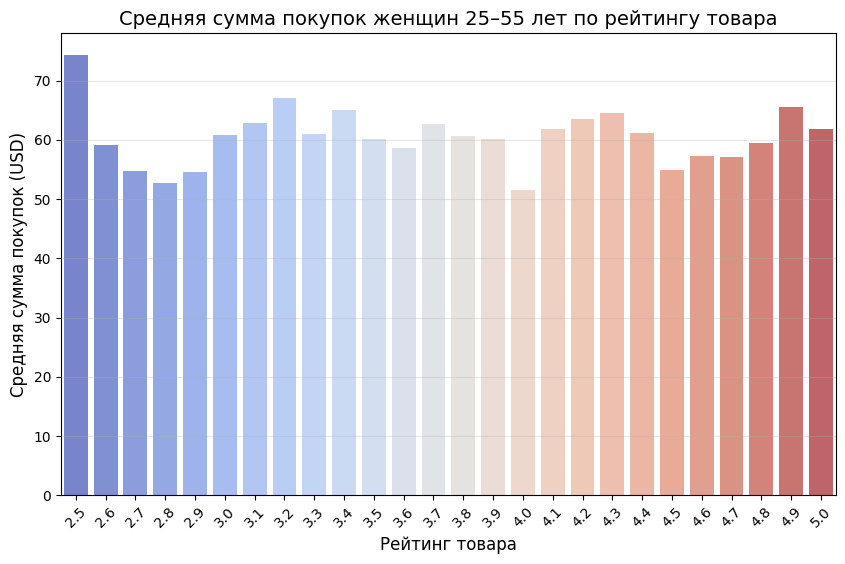

Гипотеза не подтверждается: женщины 25–55 лет не покупают больше товаров с более высоким рейтингом.


In [11]:
# Фильтрация: женщины 25–55 лет
women_25_55 = df_original[(df_original['Gender'] == 'Female') & (df_original['Age'] >= 25) & (df_original['Age'] <= 55)]

# Средние суммы покупок по рейтингу товаров
rating_purchase = women_25_55.groupby('Review Rating')['Purchase Amount (USD)'].mean()

# Группировка: высокие рейтинги (>= 4.0) и низкие рейтинги (< 4.0)
high_rating = women_25_55[women_25_55['Review Rating'] >= 4.0]['Purchase Amount (USD)']
low_rating = women_25_55[women_25_55['Review Rating'] < 4.0]['Purchase Amount (USD)']

# Проверка гипотезы: различия между высокими и низкими рейтингами
t_stat, p_value = stats.ttest_ind(high_rating, low_rating)
print(f"T-статистика: {t_stat}, p-value: {p_value}")

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_purchase.index, y=rating_purchase.values, palette='coolwarm', alpha=0.8)
plt.title("Средняя сумма покупок женщин 25–55 лет по рейтингу товара", fontsize=14)
plt.xlabel("Рейтинг товара", fontsize=12)
plt.ylabel("Средняя сумма покупок (USD)", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.show()

# Интерпретация
if p_value < 0.05:
    print("Гипотеза подтверждается: женщины 25–55 лет покупают больше товаров с более высоким рейтингом.")
else:
    print("Гипотеза не подтверждается: женщины 25–55 лет не покупают больше товаров с более высоким рейтингом.")


### "Весение мужчины" (4)
Что происходит, когда наступает весна? Природа оживает, чувства обостряются, мужчины выходят на охоту за дамами. Соответственно, при удачном раскладе наступает конфетно-букетный период: мужчины чаще покупают подарки для дам, и мужчинам чаще требуется скидка. Плюс восьмое марта.

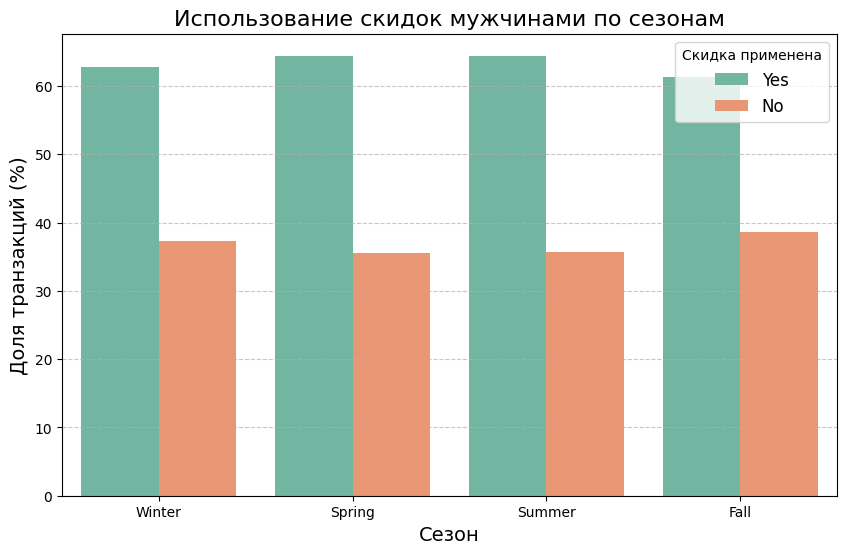

Весенний сезон: Chi2 = 56.82, P-value = 0.0000
Гипотеза подтверждается: мужчины чаще используют скидку в весенний сезон.


In [12]:
# Список сезонов
seasons = df_original['Season'].unique()

# Итоговые данные для визуализации
data = []

# Формирование данных по каждому сезону
for season in seasons:
    # Фильтрация данных: мужчины в текущем сезоне
    men_in_season = df_original[(df_original['Gender'] == 'Male') & (df_original['Season'] == season)]
    
    # Распределение скидок
    discount_counts = men_in_season['Discount Applied'].value_counts(normalize=True)
    for discount_type, value in discount_counts.items():
        data.append({'Season': season, 'Discount Applied': discount_type, 'Percentage': value * 100})

# Создание DataFrame для визуализации
df_viz = pd.DataFrame(data)

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Percentage', hue='Discount Applied', data=df_viz, palette='Set2')
plt.title("Использование скидок мужчинами по сезонам", fontsize=16)
plt.xlabel("Сезон", fontsize=14)
plt.ylabel("Доля транзакций (%)", fontsize=14)
plt.legend(title="Скидка применена", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Проверка гипотезы для весеннего сезона
spring_men = df_original[(df_original['Gender'] == 'Male') & (df_original['Season'] == 'Spring')]

# Сравнение частот использования скидок
discount_yes = spring_men[spring_men['Discount Applied'] == 'Yes'].shape[0]
discount_no = spring_men[spring_men['Discount Applied'] == 'No'].shape[0]

# Хи-квадрат тест
if discount_yes > 0 and discount_no > 0:
    chi2, p_value = stats.chisquare([discount_yes, discount_no])
    print(f"Весенний сезон: Chi2 = {chi2:.2f}, P-value = {p_value:.4f}")
    
    # Интерпретация
    if p_value < 0.05:
        print("Гипотеза подтверждается: мужчины чаще используют скидку в весенний сезон.")
    else:
        print("Гипотеза не подтверждается: мужчины не чаще используют скидку в весенний сезон.")
else:
    print("Недостаточно данных для проверки гипотезы для весеннего сезона.")


### "Секс в большом городе" (5)

Наверное, только ленивый не смотрел этот сериал, и если ты из таких, бросай всё и беги смотреть! :) Только так можно по-настоящему понять, насколько женщины могут любить туфли. Лето даёт больше возможностей для экспериментов, поэтому давайте оценим гипотезу о пристрастии женщин к летним образам с различной обувью.

Средняя сумма покупок на летнюю обувь (женщины): 58.72 USD
Средняя сумма покупок на летнюю обувь (мужчины): 58.70 USD
T-статистика: 0.01, P-value: 0.9953
Гипотеза не подтверждается: женщины не тратят на летнюю обувь больше денег, чем мужчины.


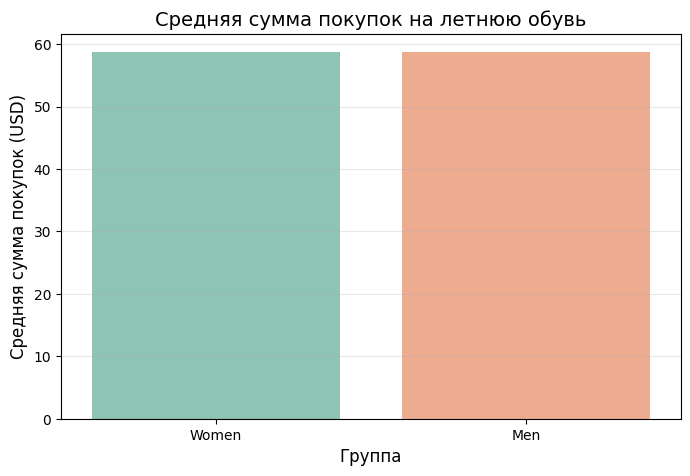

In [13]:
# Фильтрация данных: категория "Footwear" и сезон "Summer"
summer_footwear = df_original[(df_original['Category'] == 'Footwear') & (df_original['Season'] == 'Summer')]

# Разделение на мужчин и женщин
women_summer_footwear = summer_footwear[summer_footwear['Gender'] == 'Female']['Purchase Amount (USD)']
men_summer_footwear = summer_footwear[summer_footwear['Gender'] == 'Male']['Purchase Amount (USD)']

# Рассчёт средних значений
women_avg = women_summer_footwear.mean()
men_avg = men_summer_footwear.mean()

# Вывод средних
print(f"Средняя сумма покупок на летнюю обувь (женщины): {women_avg:.2f} USD")
print(f"Средняя сумма покупок на летнюю обувь (мужчины): {men_avg:.2f} USD")

# Проверка гипотезы: T-тест
t_stat, p_value = stats.ttest_ind(women_summer_footwear, men_summer_footwear, equal_var=False)
print(f"T-статистика: {t_stat:.2f}, P-value: {p_value:.4f}")

# Интерпретация
if p_value < 0.05:
    print("Гипотеза подтверждается: женщины тратят на летнюю обувь больше денег, чем мужчины.")
else:
    print("Гипотеза не подтверждается: женщины не тратят на летнюю обувь больше денег, чем мужчины.")

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x=['Women', 'Men'], y=[women_avg, men_avg], palette='Set2', alpha=0.8)
plt.title("Средняя сумма покупок на летнюю обувь", fontsize=14)
plt.xlabel("Группа", fontsize=12)
plt.ylabel("Средняя сумма покупок (USD)", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()


<a id="задание-12"></a>
### Задание 1.2

Вернуться [к Заданию 1](#задание-1) или [к содержанию](#содержание).
Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды.




Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

In [14]:
# Найти самый популярный товар
most_popular_item = shopping_trends["Item Purchased"].value_counts().idxmax()
print (most_popular_item)


Blouse


In [15]:
# Распределение покупателей по полу
gender_distribution = shopping_trends["Gender"].value_counts()
print (gender_distribution)

Gender
Male      2652
Female    1248
Name: count, dtype: int64


In [16]:
# Пол и возраст покупателей, которые покупают больше всего, чаще всего и самые дорогие товары
most_spending_gender = shopping_trends.groupby("Gender")["Purchase Amount (USD)"].sum().idxmax()
most_spending_age = shopping_trends.groupby("Age")["Purchase Amount (USD)"].sum().idxmax()

print (most_spending_gender)
print (most_spending_age)

Male
49


In [17]:
# Пол и возраст покупателей, которые покупают чаще всего
most_frequent_gender = shopping_trends["Gender"].value_counts().idxmax()
most_frequent_age = shopping_trends["Age"].value_counts().idxmax()
print (most_spending_gender)
print (most_frequent_age)

Male
69


In [18]:
# Пол и возраст покупателей, которые покупают самые дорогие товары
most_expensive_gender = shopping_trends[shopping_trends["Purchase Amount (USD)"] == shopping_trends["Purchase Amount (USD)"].max()]["Gender"].iloc[0]
most_expensive_age = shopping_trends[shopping_trends["Purchase Amount (USD)"] == shopping_trends["Purchase Amount (USD)"].max()]["Age"].iloc[0]
print (most_expensive_gender)
print (most_expensive_age)

Male
20


In [19]:
# Зависимость между цветом одежды и сезоном
color_season_dependency = shopping_trends.groupby(["Season", "Color"]).size().unstack(fill_value=0)
color_season_dependency

Color,Beige,Black,Blue,Brown,Charcoal,Cyan,Gold,Gray,Green,Indigo,...,Peach,Pink,Purple,Red,Silver,Teal,Turquoise,Violet,White,Yellow
Season,,,,,,,,,,,,,,,,,,,,,
Fall,34,42,32,35,32,43,36,44,37,37,...,42,35,37,42,39,40,27,44,27,50
Spring,39,43,39,33,42,42,38,48,38,37,...,38,44,43,31,37,46,41,45,36,40
Summer,37,42,46,33,36,42,30,40,44,32,...,24,29,38,36,59,49,36,40,43,38
Winter,37,40,35,40,43,39,34,27,50,41,...,45,45,33,39,38,37,41,37,36,46


In [20]:
# Сезонный MAU (уникальные пользователи за сезон)
seasonal_mau = shopping_trends.groupby("Season")["Customer ID"].nunique()
seasonal_mau_dynamics = seasonal_mau.pct_change().fillna(0)
print(seasonal_mau)
print(seasonal_mau_dynamics)

Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64
Season
Fall      0.000000
Spring    0.024615
Summer   -0.044044
Winter    0.016754
Name: Customer ID, dtype: float64


In [21]:
# Самая популярная буква в названии одежды
all_letters = "".join(shopping_trends["Item Purchased"]).replace(" ", "").upper()
letter_counts = Counter(all_letters)
popular_letter = letter_counts.most_common(1)[0][0]  # Самая популярная буква

print (popular_letter)


S


<a id="задание-2"></a>
### Задание 2

Вернуться [к Заданию 1](#задание-1) или [к содержанию](#содержание).

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [22]:
# Пути к файлу
drinks = "drinks.csv"
# Загрузка данных в DataFrame
drinks = pd.read_csv(drinks)


In [23]:
# Проверка структуры DataFrame
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [24]:
# Максимальное потребление каждого напитка
max_beer = drinks.loc[drinks['beer_servings'].idxmax(), ['country', 'beer_servings']]
max_spirit = drinks.loc[drinks['spirit_servings'].idxmax(), ['country', 'spirit_servings']]
max_wine = drinks.loc[drinks['wine_servings'].idxmax(), ['country', 'wine_servings']]

# Вывод результатов
print("Страна с наибольшим потреблением пива:")
print(max_beer)

print("\nСтрана с наибольшим потреблением крепких спиртных напитков:")
print(max_spirit)

print("\nСтрана с наибольшим потреблением вина:")
print(max_wine)


Страна с наибольшим потреблением пива:
country          Namibia
beer_servings        376
Name: 117, dtype: object

Страна с наибольшим потреблением крепких спиртных напитков:
country            Grenada
spirit_servings        438
Name: 68, dtype: object

Страна с наибольшим потреблением вина:
country          France
wine_servings       370
Name: 61, dtype: object


Задание 3


In [25]:
# Пути к файлу
tarantino = "tarantino.csv"
# Загрузка данных в DataFrame
tarantino = pd.read_csv(tarantino)

In [26]:
tarantino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


<a id="задание-3"></a>
### Задание 3

Вернуться [к Заданию 1](#задание-1) 

Вернуться [к Заданию 2](#задание-2)

или [к содержанию](#содержание).


Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями



In [27]:
# Просмотр уникальных значений в каждом столбце
print("Уникальные значения в столбце 'movie':")
print(tarantino['movie'].unique())

print("\nУникальные значения в столбце 'type':")
print(tarantino['type'].unique())

print("\nУникальные значения в столбце 'word':")
print(tarantino['word'].dropna().unique())  # Учитываем пропуски

print("\nУникальные значения в столбце 'minutes_in':")
print(tarantino['minutes_in'].unique())


Уникальные значения в столбце 'movie':
['Reservoir Dogs' 'Pulp Fiction' 'Kill Bill: Vol. 1' 'Kill Bill: Vol. 2'
 'Inglorious Basterds' 'Django Unchained' 'Jackie Brown']

Уникальные значения в столбце 'type':
['word' 'death']

Уникальные значения в столбце 'word':
['dick' 'dicks' 'fucked' 'fucking' 'bullshit' 'fuck' 'shit' 'motherfucker'
 'pussy' 'fucks' 'hell' 'jap' 'bastard' 'goddamn' 'motherfuckers'
 'asshole' 'ass' 'assholes' 'n-word ' 'asses' 'bitch' 'fuckup' 'fucker'
 'shitty' 'asshead' 'damn' 'damned' 'bitches' 'wetback' 'faggot'
 'cocksucker' 'gook' 'fuckers' 'gooks' 'motherfucking' 'dickless'
 'chickenshit' 'slope' 'fuckhead' 'merde' 'shithead' 'cunt' 'cunts'
 'fuckface' 'cockblockery' 'japs' 'jew (verb)' 'bastards' 'horeshit'
 'shitless' 'shitting' 'negro ' 'squaw' 'slut' 'goddamned' 'jackass'
 'horseshit' 'shittiest' 'shitload' 'dumbass']

Уникальные значения в столбце 'minutes_in':
[  0.4    0.43   0.55 ... 142.47 142.97 143.13]


In [28]:
# Число проклятий, летальных исходов и их соотношение по фильмам
summary_by_movie = tarantino.groupby('movie').apply(lambda x: pd.Series({
    'curse_count': x[x['type'] == 'word'].shape[0],
    'death_count': x[x['type'] == 'death'].shape[0]
}))
summary_by_movie['curse_to_death_ratio'] = summary_by_movie['curse_count'] / summary_by_movie['death_count']
print("Соотношение проклятий и смертей по фильмам:")
print(summary_by_movie)


Соотношение проклятий и смертей по фильмам:
                     curse_count  death_count  curse_to_death_ratio
movie                                                              
Django Unchained             262           47              5.574468
Inglorious Basterds           58           48              1.208333
Jackie Brown                 368            4             92.000000
Kill Bill: Vol. 1             57           63              0.904762
Kill Bill: Vol. 2             69           11              6.272727
Pulp Fiction                 469            7             67.000000
Reservoir Dogs               421           10             42.100000


In [29]:
# Частота употребления конкретных проклятий
curse_frequency = tarantino[tarantino['type'] == 'word']['word'].value_counts()
print("\nЧастота употребления конкретных проклятий:")
print(curse_frequency)



Частота употребления конкретных проклятий:
word
fucking          407
shit             221
fuck             213
n-word           179
ass              140
goddamn          113
motherfucker      70
bitch             64
hell              45
damn              37
motherfucking     27
fucked            25
bullshit          15
motherfuckers     15
dick              14
pussy             11
asshole           10
bastard           10
bitches            9
fucker             8
assholes           5
negro              5
dicks              5
asses              4
shitty             4
damned             3
fucks              3
shithead           3
horseshit          2
gooks              2
japs               2
cunt               2
shitload           2
cocksucker         2
wetback            2
fuckers            1
horeshit           1
jap                1
shittiest          1
fuckup             1
jackass            1
goddamned          1
slut               1
squaw              1
asshead            1
shitti


Распределение времени между проклятиями:
      minutes_in  time_diff
0           0.40        NaN
1           0.43       0.03
431         0.52       0.09
2           0.55       0.03
3           0.61       0.06
...          ...        ...
1516      159.80       0.03
1517      159.83       0.03
1518      159.88       0.05
1519      160.20       0.32
1520      160.28       0.08

[1704 rows x 2 columns]


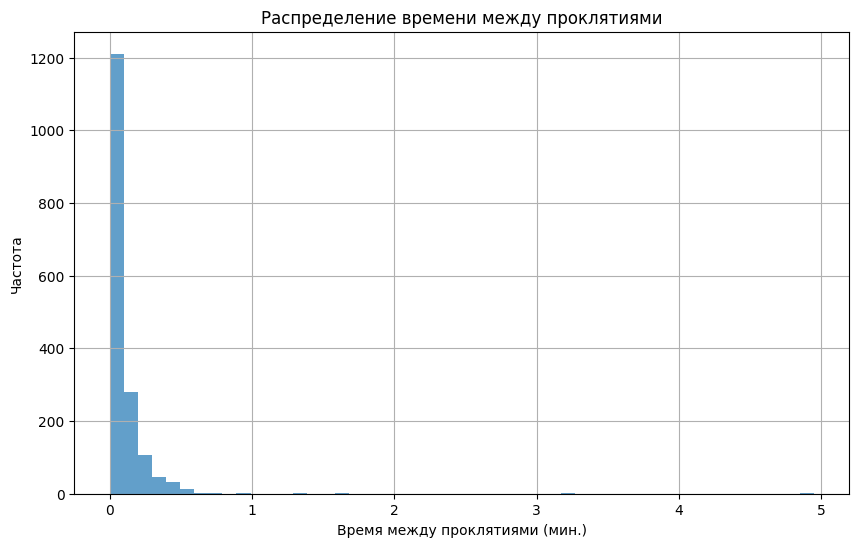

In [30]:
# Распределение времени между проклятиями
curse_timing = tarantino[tarantino['type'] == 'word'].sort_values(by='minutes_in')
curse_timing['time_diff'] = curse_timing['minutes_in'].diff()
print("\nРаспределение времени между проклятиями:")
print(curse_timing[['minutes_in', 'time_diff']])


plt.figure(figsize=(10, 6))
curse_timing['time_diff'].dropna().plot(kind='hist', bins=50, alpha=0.7)
plt.title('Распределение времени между проклятиями')
plt.xlabel('Время между проклятиями (мин.)')
plt.ylabel('Частота')
plt.grid()
plt.show()


### Спасибо тебе за уделенное время! 
